In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/spam.csv',encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
df.shape

(5572, 5)

In [4]:
df.drop(columns =['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [6]:
df.duplicated().sum()

403

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['target'] = df['target'].map({'ham':0,'spam':1})
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# **EDA of the data**

In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<Axes: ylabel='count'>

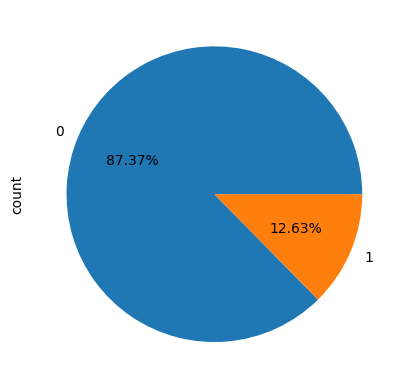

In [10]:
#0 --> ham
#1 --> spam
df['target'].value_counts().plot(kind='pie',autopct='%1.2f%%')

In [11]:
import nltk
df['length'] = df['text'].apply(len)
df.head()

,target,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='length'>

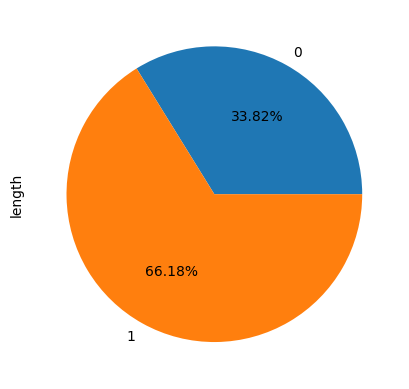

In [12]:
df.groupby('target')['length'].mean().plot(kind='pie',autopct='%1.2f%%')

In [13]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['words'] = df['text'].apply(lambda x:len(word_tokenize(x)))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,target,text,length,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [14]:
from nltk.tokenize import sent_tokenize
df['sentences'] = df['text'].apply(lambda x:len(sent_tokenize(x)))
df.head()

,target,text,length,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [15]:
df[['length','words','sentences']].describe()

,length,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


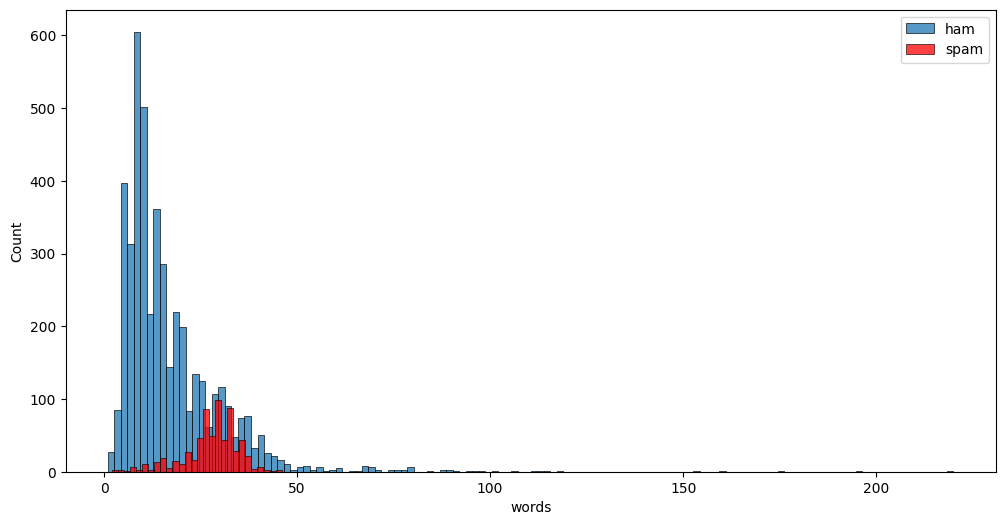

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['words'])
sns.histplot(df[df['target']==1]['words'],color='red')
plt.legend(['ham','spam'])
plt.show()

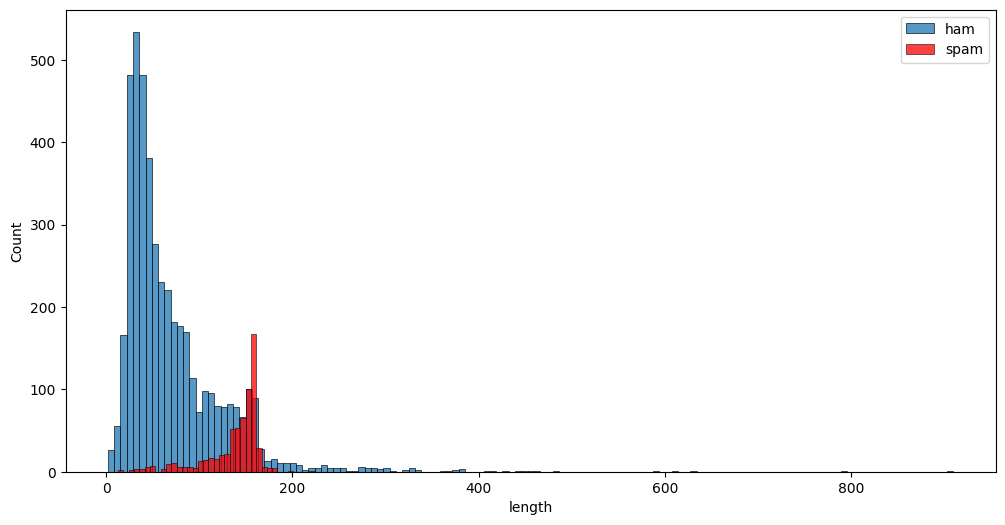

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['length'])
sns.histplot(df[df['target']==1]['length'],color='red')
plt.legend(['ham','spam'])
plt.show()

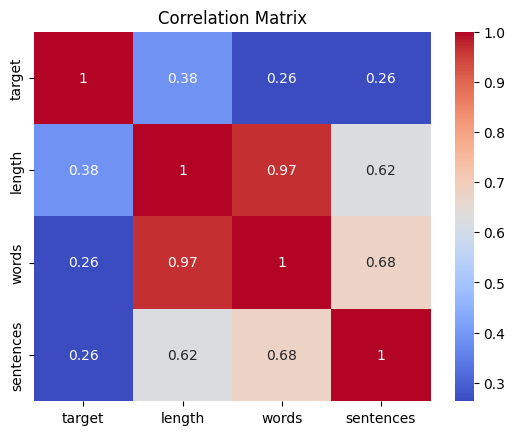

In [18]:
# Select only the numeric columns for correlation calculation.
numeric_df = df[['target','length', 'words', 'sentences']]
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Text Preprocessing**
*  Lower case conversion
*  stopwords
*  stemming
*  tokenization
*  removing punctuation and special characters

In [19]:
# lowercase conversion
df['transformed_text'] = df['text'].apply(lambda x: x.lower())

In [20]:
# removing all the punctuation and special characters
import string
punc = string.punctuation

# function to remove punctuation from the text
def remove_punc(text):
  return text.translate(str.maketrans('','',punc))

# function to remove special characters from text
def remove_special_char(text):
  import re
  pattern = re.compile(r'[^a-zA-Z0-9\s]')
  return pattern.sub('',text)

In [21]:
df['transformed_text'] = df['transformed_text'].apply(remove_punc)
df['transformed_text'] = df['transformed_text'].apply(remove_special_char)
df.head()

,target,text,length,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i dont think he goes to usf he lives aroun...


In [22]:
# tokenization of emails
from nltk.tokenize import word_tokenize
df['transformed_text'] = df['transformed_text'].apply(word_tokenize)
df.head()

,target,text,length,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [23]:
# removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# funtion to remove stopwords
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
df['transformed_text'] = df['transformed_text'].apply(remove_stopwords)
df.head()

,target,text,length,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, dont, think, goes, usf, lives, around, t..."


In [25]:
# applying stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

# function to apply stemming
def stemming(text):
  return [ps.stem(word) for word in text]

df['transformed_text'] = df['transformed_text'].apply(stemming)
df.head()


,target,text,length,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, dont, think, goe, usf, live, around, tho..."


In [26]:
def join_text(text):
  return ' '.join(text)
df['transformed_text'] = df['transformed_text'].apply(join_text)
df.head()

,target,text,length,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


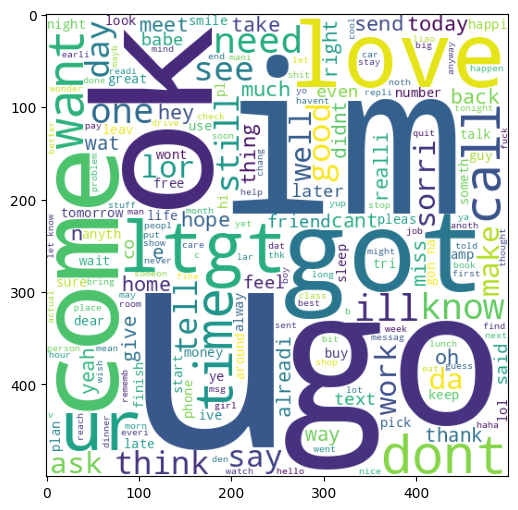

In [27]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

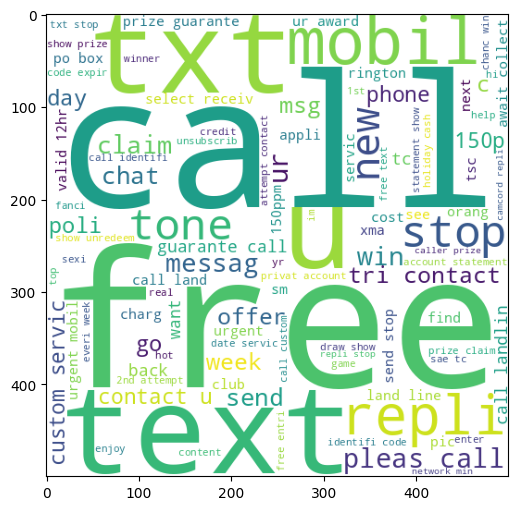

In [28]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

In [29]:
# extracting the words from the text
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [30]:
len(spam_corpus)

10813

<ipython-input-31-d42f36dbe2ca>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp['word'],y=temp['count'],palette='plasma')


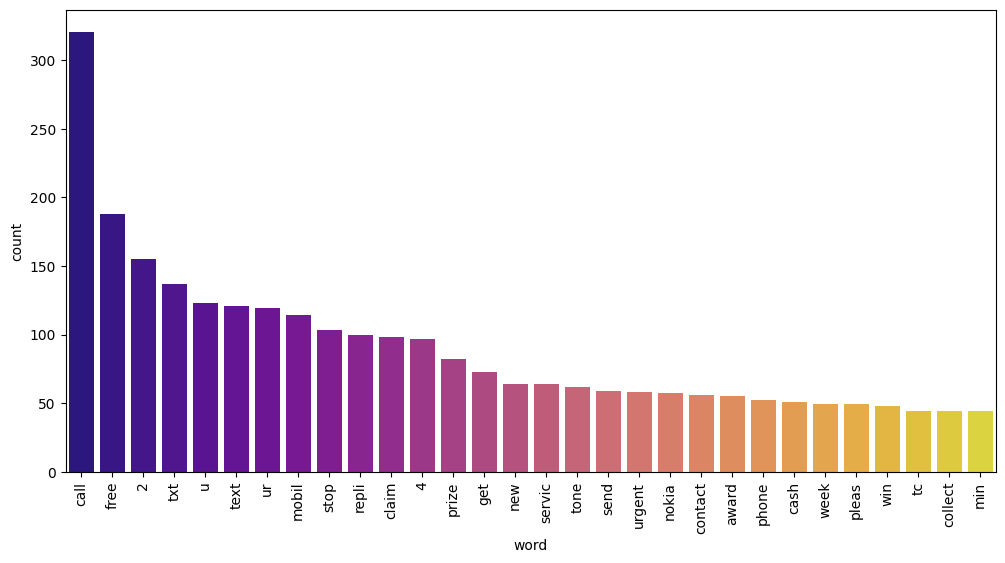

In [31]:
from collections import Counter
temp = pd.DataFrame(Counter(spam_corpus).most_common(30))
temp.columns = ['word','count']

plt.figure(figsize=(12,6))
sns.barplot(x=temp['word'],y=temp['count'],palette='plasma')
plt.xticks(rotation='vertical')
plt.show()

In [32]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

<ipython-input-33-0d03eeedf10c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp['word'],y=temp['count'],palette='plasma')


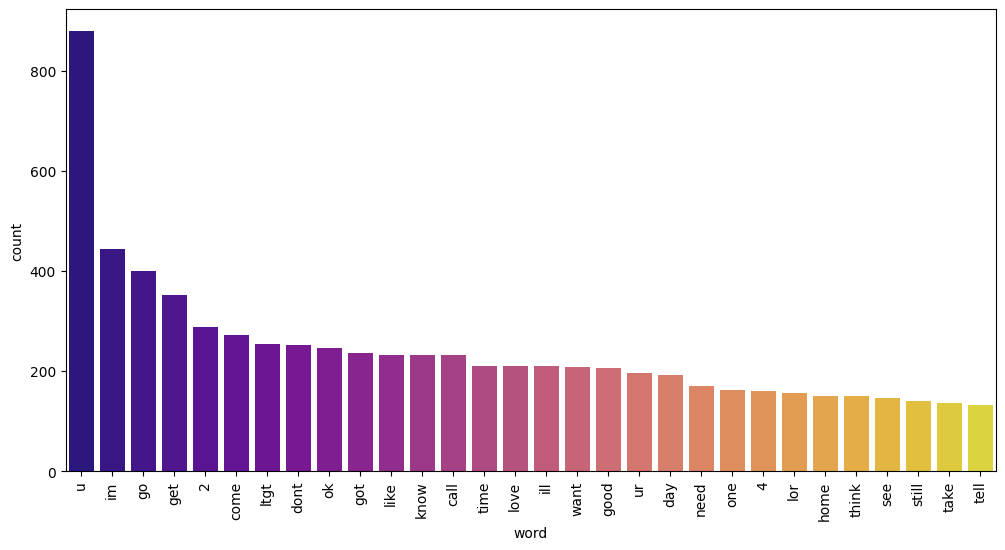

In [33]:
from collections import Counter
temp = pd.DataFrame(Counter(ham_corpus).most_common(30))
temp.columns = ['word','count']

plt.figure(figsize=(12,6))
sns.barplot(x=temp['word'],y=temp['count'],palette='plasma')
plt.xticks(rotation='vertical')
plt.show()

# **Model Building**

In [34]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [35]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [36]:
y = df['target'].values
y.shape

(5169,)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [39]:
gnb = GaussianNB()
rf = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=5)
svc = SVC(kernel='sigmoid', gamma=1.0)

In [40]:
models = {
    'GaussianNB':gnb,
    'RandomForestClassifier':rf,
    'KNeighborsClassifier':knn,
    'LogisticRegression':lr,
    'DecisionTreeClassifier':dt,
    'SVC':svc
}

In [ ]:
accuracy = []
precision = []

for model_name,model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(f'Accuracy for {model_name} is {accuracy_score(y_test,y_pred)}')
  print(f'Precision for {model_name} is {precision_score(y_test,y_pred)}')
  print()
  accuracy.append(accuracy_score(y_test,y_pred))
  precision.append(precision_score(y_test,y_pred))

Accuracy for GaussianNB is 0.874274661508704
Precision for GaussianNB is 0.5175438596491229

Accuracy for RandomForestClassifier is 0.9758220502901354
Precision for RandomForestClassifier is 0.9829059829059829

Accuracy for KNeighborsClassifier is 0.9032882011605415
Precision for KNeighborsClassifier is 1.0

Accuracy for LogisticRegression is 0.9535783365570599
Precision for LogisticRegression is 0.96875

Accuracy for DecisionTreeClassifier is 0.9361702127659575
Precision for DecisionTreeClassifier is 0.839622641509434



In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(models['RandomForestClassifier'],open('model.pkl','wb'))